the most common ways to prevent overfitting in neural networks:

*   Getting more training data. (Augmentation)
*   Reducing the capacity of the network. (inputs size)
*   Adding weight regularization.
*   Adding dropout.

In [1]:
import keras
keras.__version__

'3.8.0'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.

  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
from keras import models
from keras import layers

original_model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
original_hist = original_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - acc: 0.7251 - loss: 0.5837 - val_acc: 0.8698 - val_loss: 0.3733
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.8992 - loss: 0.3082 - val_acc: 0.8863 - val_loss: 0.2969
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9209 - loss: 0.2290 - val_acc: 0.8907 - val_loss: 0.2777
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.9315 - loss: 0.1938 - val_acc: 0.8820 - val_loss: 0.2951
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.9418 - loss: 0.1659 - val_acc: 0.8767 - val_loss: 0.3124
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9489 - loss: 0.1463 - val_acc: 0.8808 - val_loss: 0.3064
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9576 - loss: 0.1278 - val_acc: 0.8755 - val_loss: 0.3294
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9625 - loss: 0.1163 - val_acc: 0.8664 - val_loss: 0.3721
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.964

In [8]:
smaller_model = models.Sequential([
    layers.Dense(4, activation='relu', input_shape=(10000,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

smaller_model_hist = smaller_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - acc: 0.6677 - loss: 0.6572 - val_acc: 0.8573 - val_loss: 0.5288
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.8791 - loss: 0.4782 - val_acc: 0.8725 - val_loss: 0.4080
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9017 - loss: 0.3543 - val_acc: 0.8829 - val_loss: 0.3373
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9153 - loss: 0.2792 - val_acc: 0.8880 - val_loss: 0.3027
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9215 - loss: 0.2407 - val_acc: 0.8878 - val_loss: 0.2865
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9309 - loss: 0.2068 - val_acc: 0.8900 - val_loss: 0.2783
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.9370 - loss: 0.1851 - val_acc: 0.8898 - val_loss: 0.2776
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.9435 - loss: 0.1672 - val_acc: 0.8874 - val_loss: 0.2825
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.947

In [9]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_val_loss = smaller_model_hist.history['val_loss']

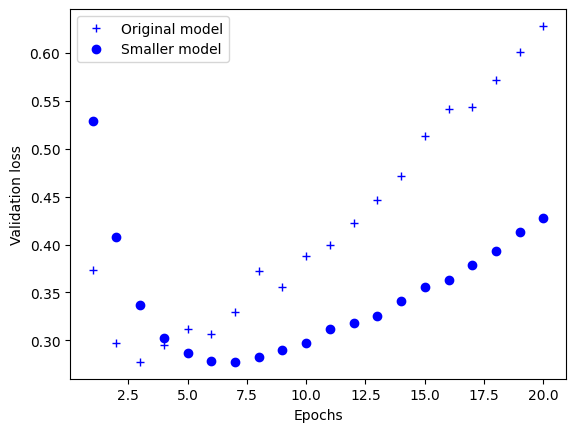

In [10]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [11]:
bigger_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(10000,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - acc: 0.6782 - loss: 0.5972 - val_acc: 0.8810 - val_loss: 0.3004
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - acc: 0.8821 - loss: 0.2889 - val_acc: 0.8612 - val_loss: 0.3227
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - acc: 0.9161 - loss: 0.2145 - val_acc: 0.8713 - val_loss: 0.3064
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9378 - loss: 0.1650 - val_acc: 0.8822 - val_loss: 0.2840
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - acc: 0.9590 - loss: 0.1158 - val_acc: 0.8452 - val_loss: 0.4539
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.9616 - loss: 0.1006 - val_acc: 0.8791 - val_loss: 0.3300
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 0.9859 - loss: 0.0557 - val_acc: 0.8775 - val_loss: 0.4044
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.9865 - loss: 0.0513 - val_acc: 0.8792 - val_loss: 0.4376
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.988

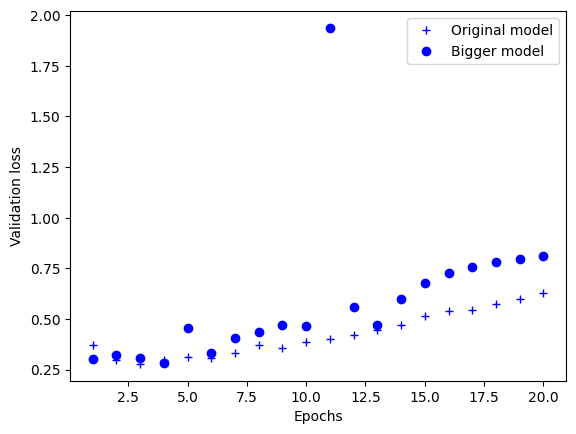

In [13]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

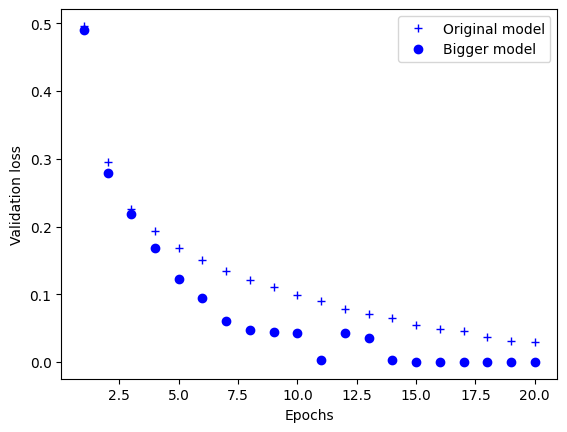

In [14]:
original_loss = original_hist.history['loss']
bigger_model_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [15]:
from keras import regularizers

l2_model = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                 activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - acc: 0.7285 - loss: 0.6122 - val_acc: 0.8722 - val_loss: 0.4007
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.8946 - loss: 0.3507 - val_acc: 0.8802 - val_loss: 0.3496
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9164 - loss: 0.2785 - val_acc: 0.8888 - val_loss: 0.3267
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - acc: 0.9281 - loss: 0.2485 - val_acc: 0.8848 - val_loss: 0.3321
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - acc: 0.9359 - loss: 0.2328 - val_acc: 0.8859 - val_loss: 0.3340
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.9420 - loss: 0.2202 - val_acc: 0.8750 - val_loss: 0.3618
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.9447 - loss: 0.2111 - val_acc: 0.8812 - val_loss: 0.3490
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9490 - loss: 0.2005 - val_acc: 0.8780 - val_loss: 0.3628
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - acc: 0.954

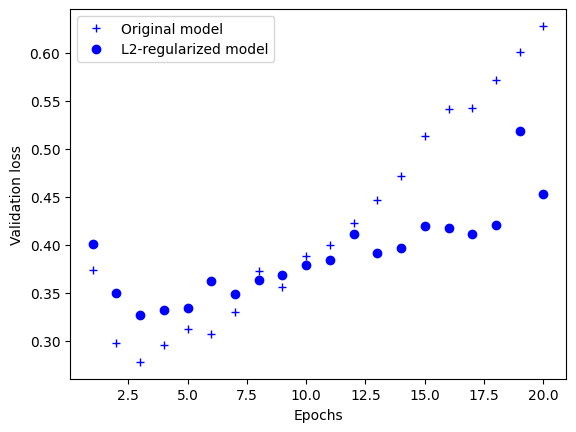

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [18]:
dpt_model = models.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [19]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - acc: 0.5952 - loss: 0.6530 - val_acc: 0.8624 - val_loss: 0.4489
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - acc: 0.7897 - loss: 0.4787 - val_acc: 0.8792 - val_loss: 0.3382
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.8507 - loss: 0.3744 - val_acc: 0.8874 - val_loss: 0.2926
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.8816 - loss: 0.3215 - val_acc: 0.8874 - val_loss: 0.2812
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9024 - loss: 0.2770 - val_acc: 0.8879 - val_loss: 0.2766
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9186 - loss: 0.2401 - val_acc: 0.8864 - val_loss: 0.2880
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.9210 - loss: 0.2218 - val_acc: 0.8868 - val_loss: 0.2969
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - acc: 0.9347 - loss: 0.2035 - val_acc: 0.8850 - val_loss: 0.3066
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.940

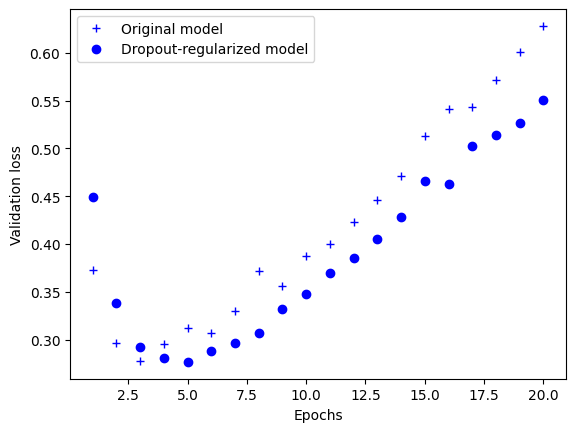

In [20]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()